# Can we detect climate misinformation by analysing a single word or phrase?

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [2]:
import sys  
sys.path.insert(0, '../text_preprocessing/')

In [3]:
from preprocessing import *
from embeddings import *

/usr/local/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [4]:
# DATA_DIR = os.path.join('..', 'labelled_data') 
# DATASET = os.path.join(DATA_DIR, 'labelled_data_14032021.csv')
# df = pd.read_csv(DATASET, header=0)
# df.info()

In [5]:
# df.head(10)

In [6]:
# df.label.value_counts()

In [7]:
# # remove double white spaces
# df.text = df.text.replace('\s+', ' ', regex=True)

# # text length
# # df['text_len'] = df.text.str.len()
# # df['word_count'] = df.text.str.count(' ') + 1

# # convert labels
#     # - 118: climate denying
#     # - 119: not climate denying
#     # - 120: not climate related
# labels = {
#     118: 'climate denying',
#     119: 'not climate denying',
#     120: 'not climate related'
# }
# df.label = df.label.apply(lambda x: labels[x] if x in labels else 'other')

# # for prettier plots, indicate label is a category
# df.label = df.label.astype('category')

# df.label.value_counts()

../text_preprocessing/preprocessing.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['human_label'] = encoded_classes
../text_preprocessing/preprocessing.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['human_binary_label'] = df_encoded['human_label'].apply(lambda label: 1 if label > 0 else 0)


Importing data...
   label                                               text
0    118  Buenos Aires Playa is an urban beach on the Rí...
1    123  Contributed by Robert Lyman  © 2017The United ...
2    119  Contributed by Robert Lyman  © 2017The United ...
3    119  Share this...FacebookTwitterState parliamentar...
4    122  [CHECK OUT OUR PLANS](https://thebfd.co.nz/sub...
Size of dataframe
Index(['label', 'text'], dtype='object')
(778, 2)

Dropping na values..
NaN values per column
label     0
text     62
dtype: int64

Encoding classes..
118 is encoded to [0]
119 is encoded to [1]
120 is encoded to [2]

Filtering long doocuments and exploring length..
Article length distributon
count     628.000000
mean      704.353503
std       524.516163
min        66.000000
25%       390.000000
50%       651.500000
75%       861.000000
max      4674.000000
Name: text_length, dtype: float64
Histogram lens of articles


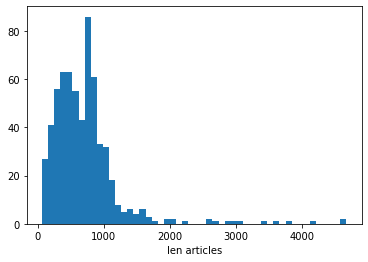

Article length distributon
count     599.000000
mean      620.439065
std       299.411590
min        66.000000
25%       384.000000
50%       602.000000
75%       824.000000
max      1484.000000
Name: text_length, dtype: float64
Histogram lens of articles


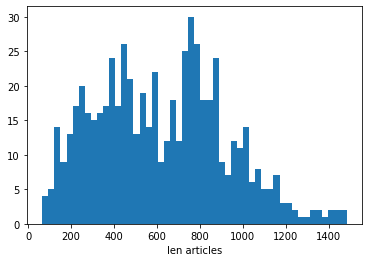


Starting text preprocessing..
628


,text,human_label,human_binary_label,text_length,clean_text
0,Buenos Aires Playa is an urban beach on the Rí...,0,0,408,"[buenos, aire, playa, urban, beach, ro, de, la..."
2,Contributed by Robert Lyman © 2017The United ...,1,1,1591,"[contribute, robert, lyman, unite, kingdom, fi..."
3,Share this...FacebookTwitterState parliamentar...,1,1,598,"[thisfacebooktwitterstate, parliamentarian, wo..."
5,"On April 7, I wrote about global warming “hoth...",0,0,666,"[april, write, global, warm, hothead, dominate..."
6,From PragerU\r\nHas environmentalism become mo...,2,1,124,"[prageru, environmentalism, become, good, fait..."


In [8]:
path = '../labelled_data/labelled_data_14032021.csv'

print("Importing data...")
df = import_data(path)

print("\nDropping na values..")
df = na_values(df)

print("\nEncoding classes..")
df, label_columns = class_encoding(df)

print("\nFiltering long doocuments and exploring length..")
documents_len_exploration_and_filter(df,max_len=1500)

print("\nStarting text preprocessing..")
clean_text = preprocessing(df)

df['clean_text'] = clean_text

print(len(df))
df.head()

## Wordclouds for each Class

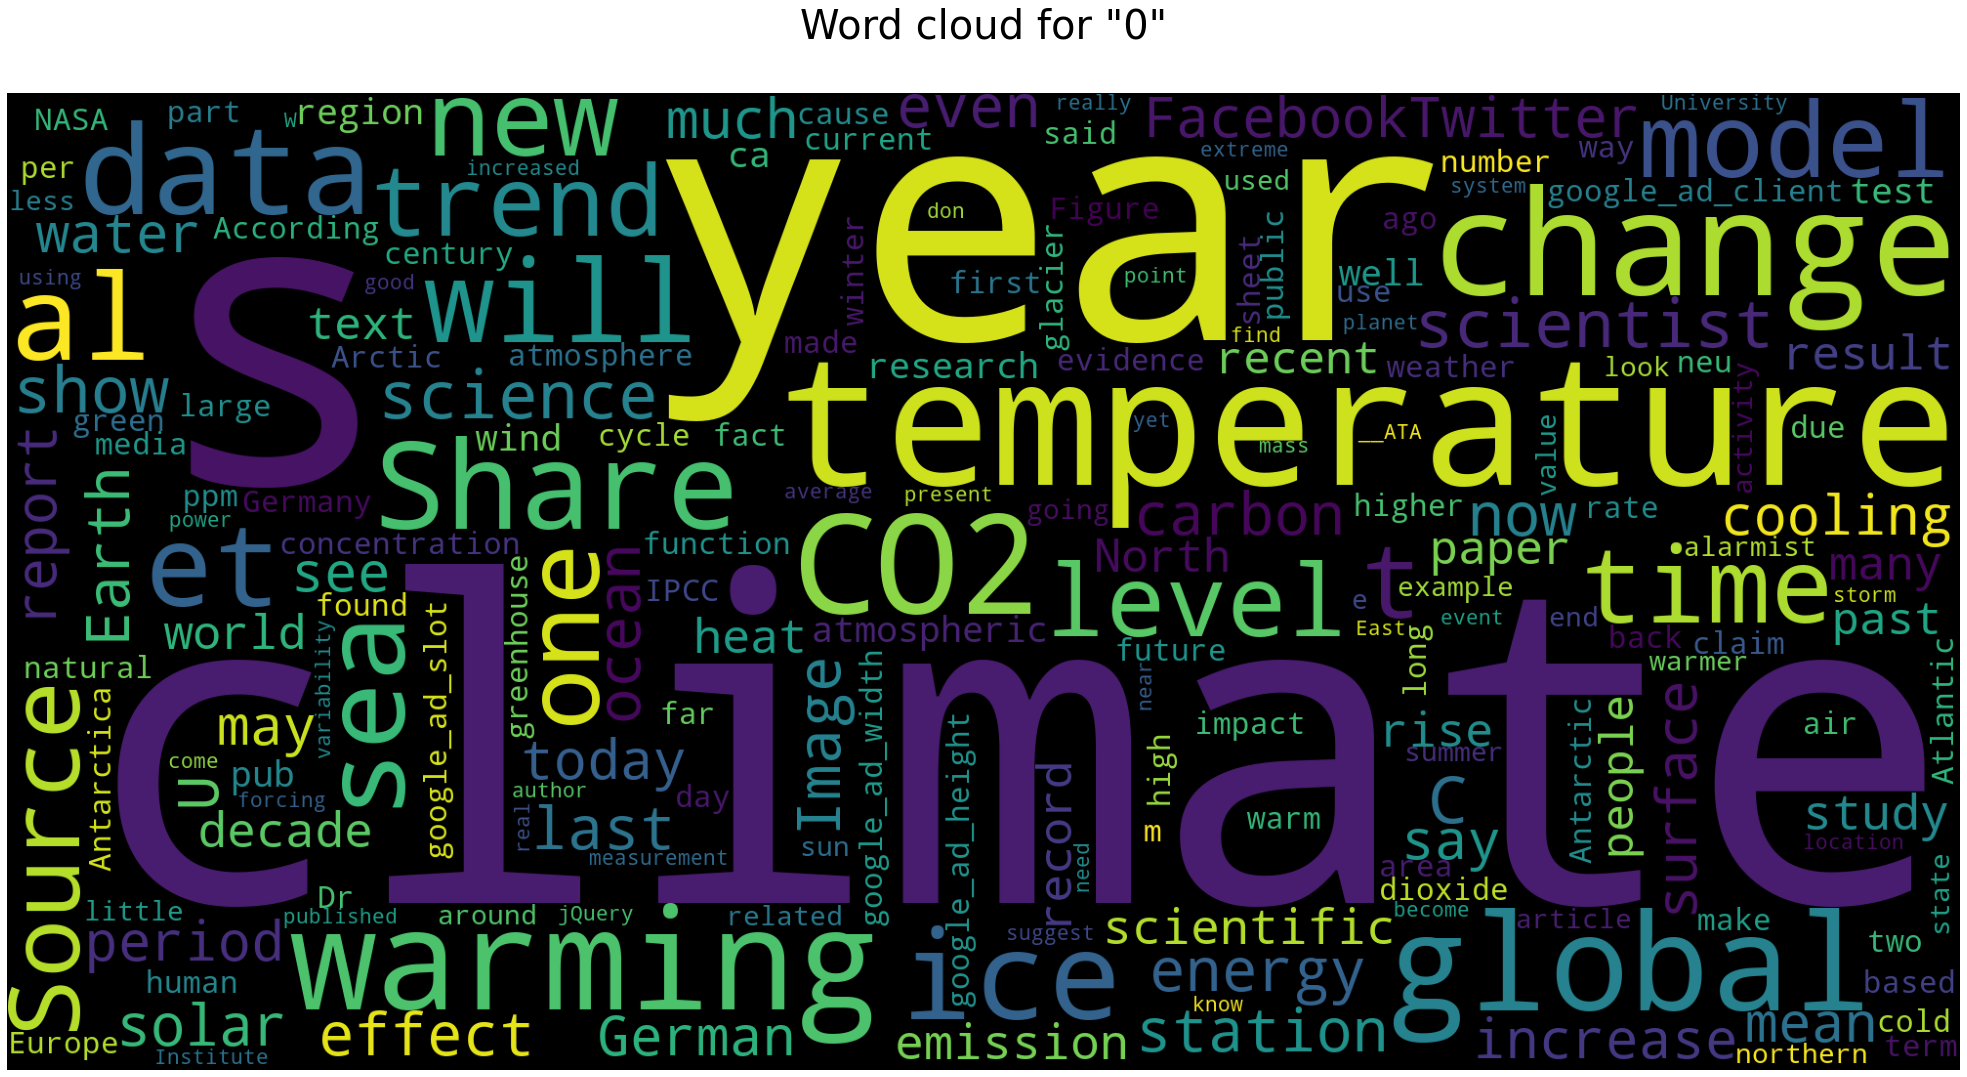



#########




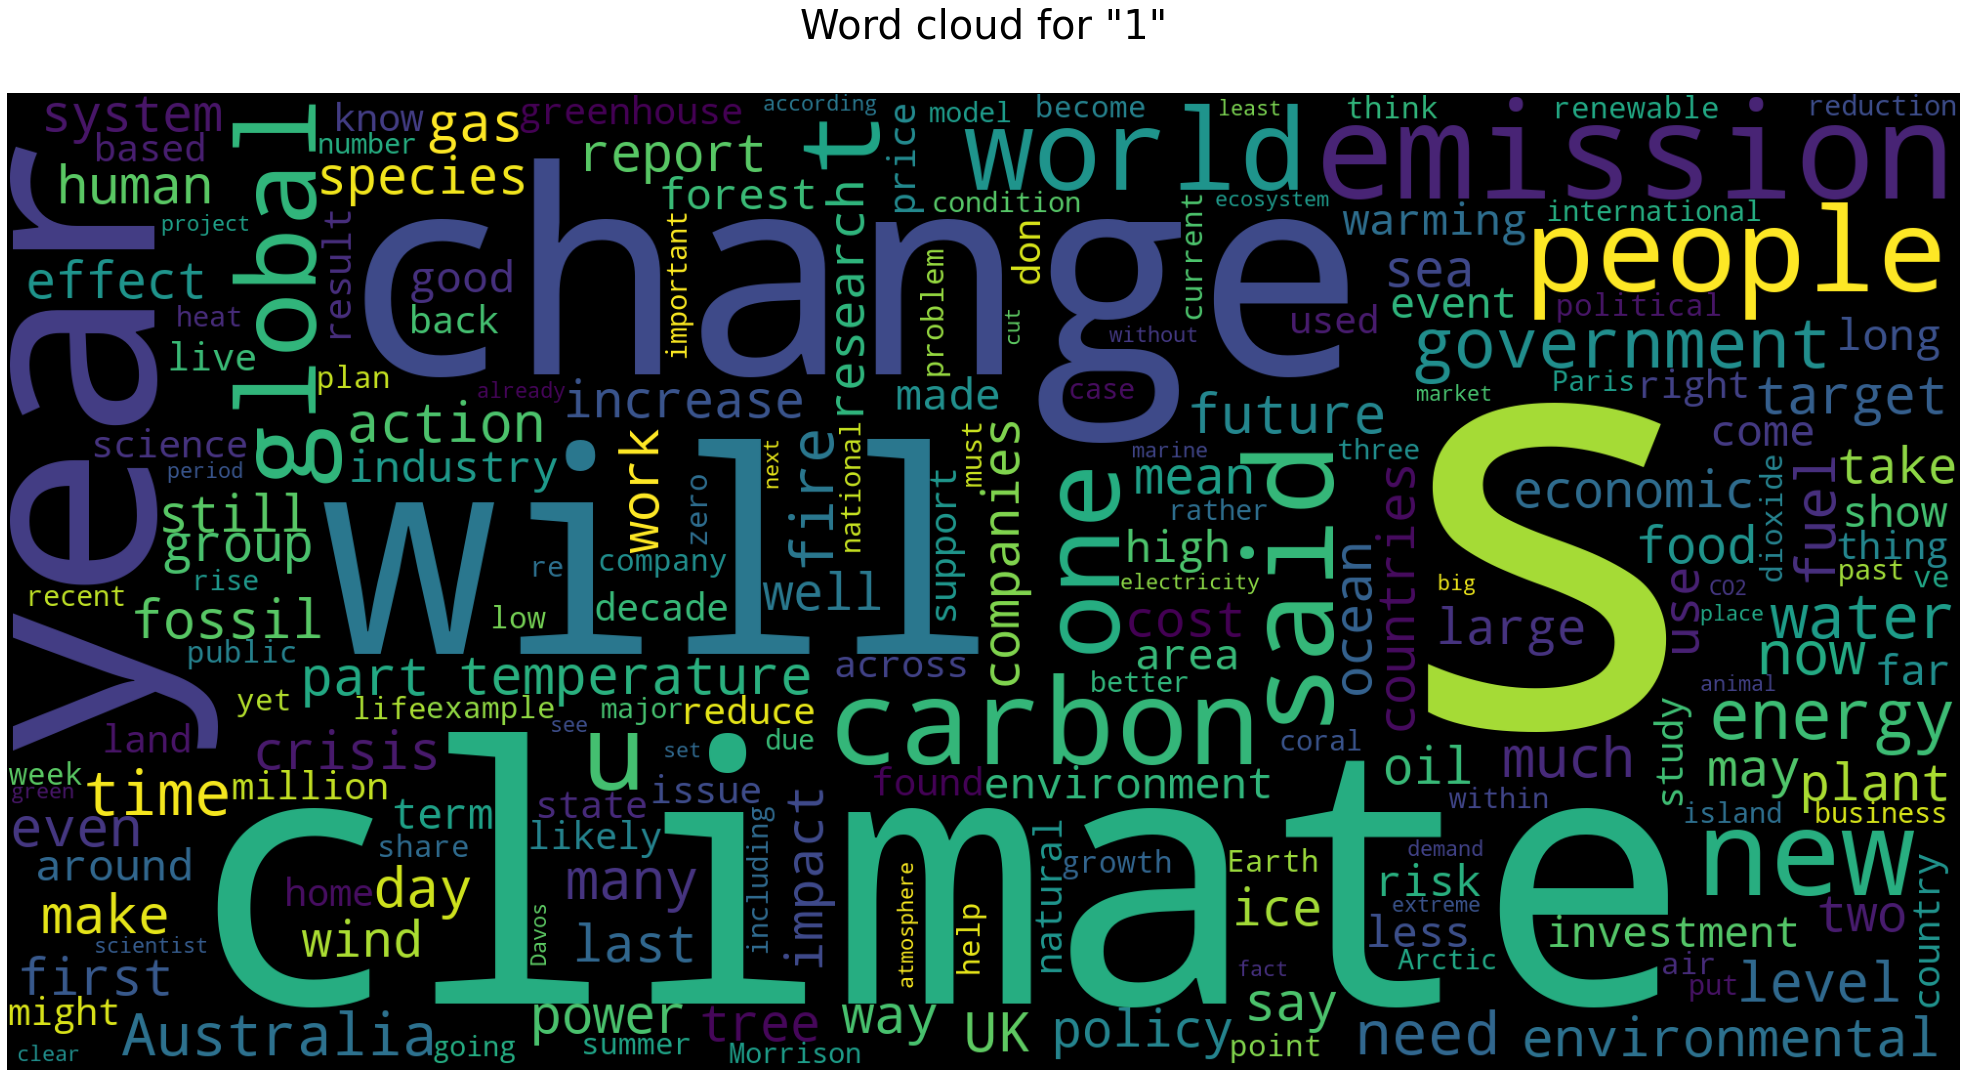



#########




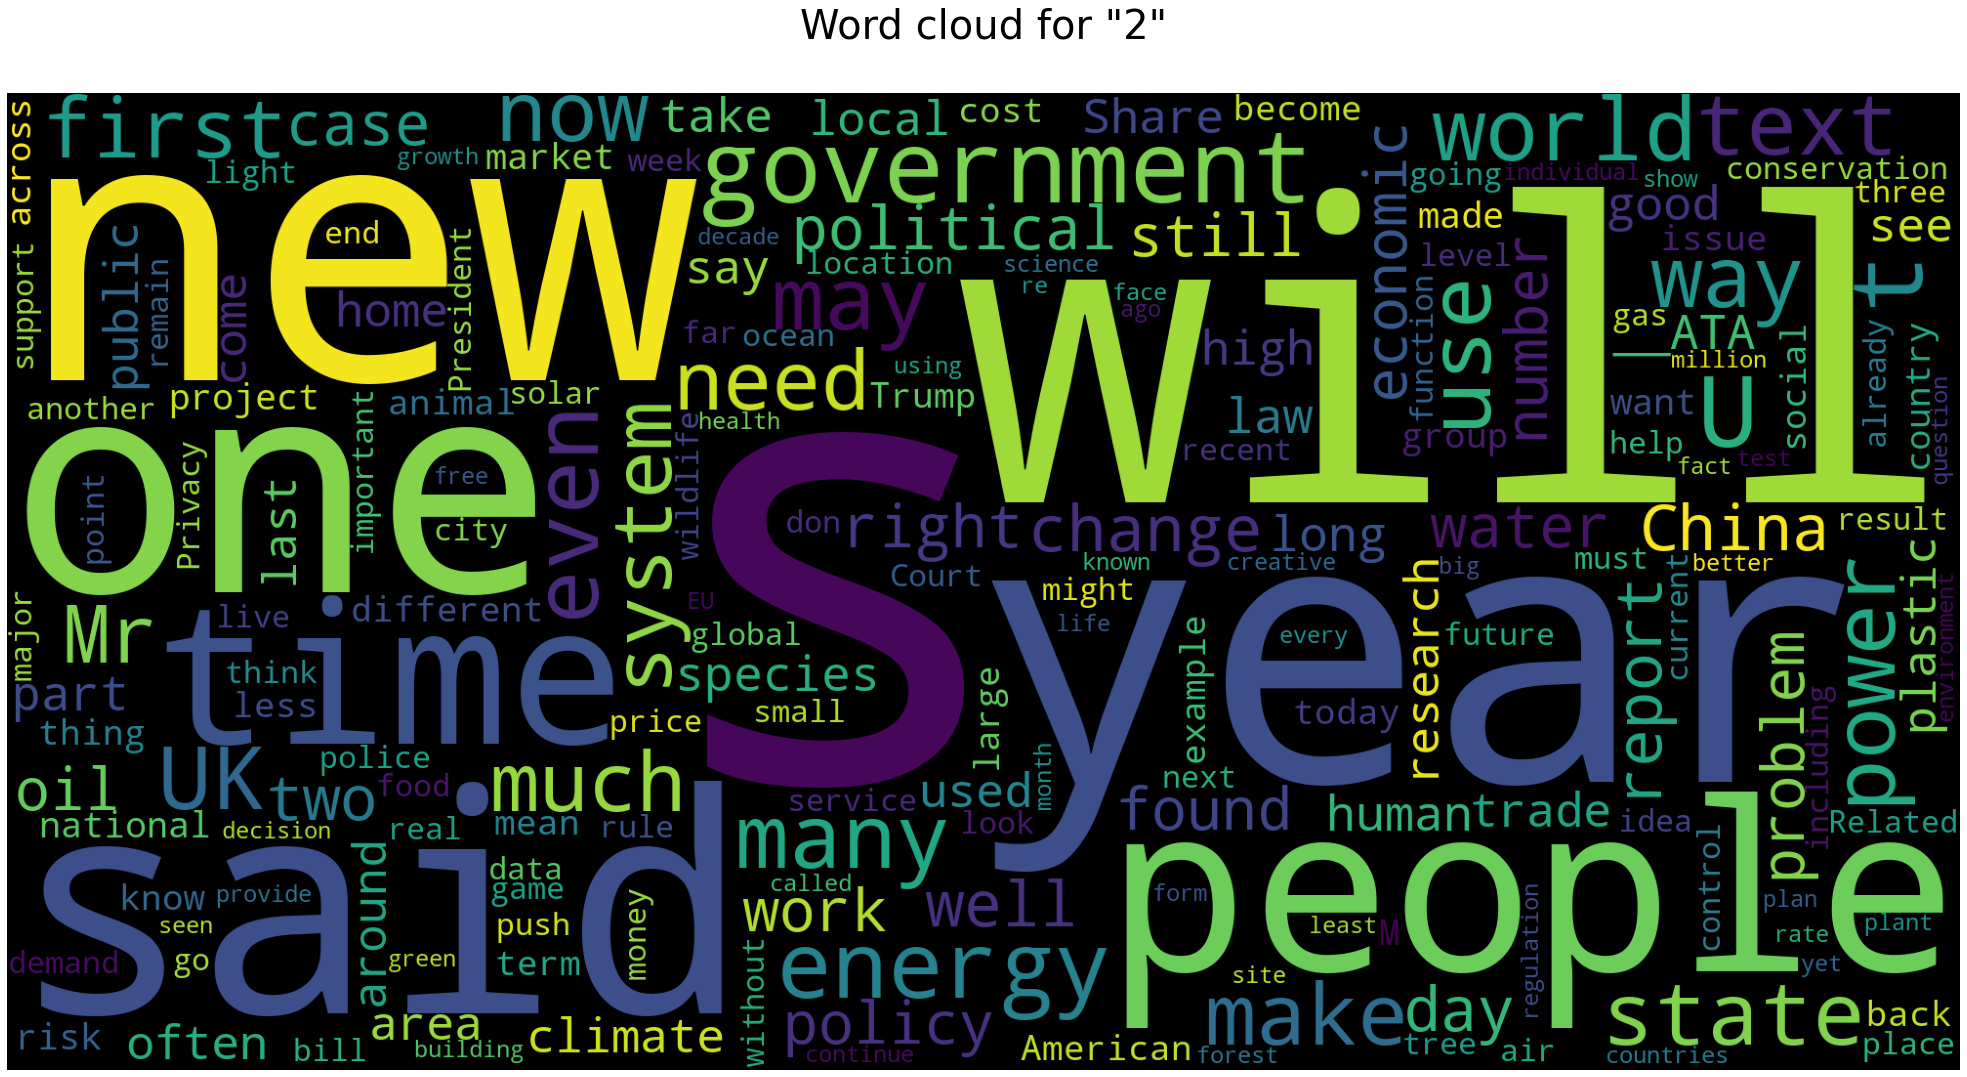



#########




In [9]:
# Same code can be used to generate wordclouds of other categories.
def plot_wordcloud(label):

    plt.figure(figsize=(35,20))

    text = df[df.human_label == label].text.fillna("").values
    cloud_text = WordCloud(
                              stopwords=STOPWORDS,
                              background_color='black',
                              collocations=False,
                              width=2000,
                              height=1000
                             ).generate(" ".join(text))
    plt.axis('off')
    plt.title('Word cloud for "{0}"\n'.format(label),fontsize=40)
    plt.imshow(cloud_text)
    plt.show()

for col in df.human_label.unique():
#     print(col)
    plot_wordcloud(col)
    print("\n\n#########\n\n")

## Most frequent Keywords

In [10]:
top_n = []
n = 1000

for col in df.human_label.unique():
    print(col)
    d = {
        "label": col,
        "top_{0}".format(n): pd.Series(' '.join(df.loc[df.human_label == col,
                                                       'text'].fillna("").astype(str).values)\
                                       .lower().split()).value_counts()[:n].index
    }
    top_n.append(d)

top_n

0
1
2


[{'label': 0,
  'top_1000': Index(['the', 'of', 'and', 'to', 'in', 'a', 'is', 'that', 'for', 'climate',
         ...
         'estimate', 'didn’t', 'world’s', 'comment', 'causing', 'calls',
         'knowledge', 'agenda', 'predict', 'social'],
        dtype='object', length=1000)},
 {'label': 1,
  'top_1000': Index(['the', 'to', 'of', 'and', 'in', 'a', 'is', 'that', 'for', 'on',
         ...
         'generally', 'completely', 'labels', 'followed', 'storage', 'benefits',
         'six', 'moved', 'improve', 'corporate'],
        dtype='object', length=1000)},
 {'label': 2,
  'top_1000': Index(['the', 'of', 'to', 'and', 'in', 'a', 'is', 'that', 'for', 'on',
         ...
         'long‐​term', 'tonnes', 'via', 'conservative', '40', 'weeks', 'cover',
         'position', 'world.', 'steel'],
        dtype='object', length=1000)}]

In [11]:
top_misinfo_only = []

for val in top_n[0]["top_{0}".format(n)]:
    if (val in top_n[1]["top_{0}".format(n)]) or (val in top_n[2]["top_{0}".format(n)]):
        continue
    top_misinfo_only.append(val)

len(top_misinfo_only), top_misinfo_only

(297,
 ['et',
  'al.,',
  'source:',
  'this...facebooktwitter',
  'cooling',
  'google_ad_client',
  '/*',
  '*/',
  '"6412247007";',
  'google_ad_slot',
  'google_ad_height',
  '<!--',
  '//-->',
  '"ca-pub-3545577860068042";',
  'neu',
  'google_ad_width',
  'antarctic',
  'dr.',
  'nasa',
  'stations',
  '>',
  'sheet',
  'ipcc',
  'trends',
  'mass',
  'winter',
  'figure',
  'warming.',
  'al.',
  'germany',
  'century',
  'anthropogenic',
  'forcing',
  'institute',
  'antarctica',
  'elevated',
  'claims',
  'observed',
  'die',
  'scientist',
  'concentration',
  'ppm',
  'cycle',
  '3',
  'variability',
  'here.',
  'greenland',
  '4',
  'm',
  'greta',
  'sun',
  'records',
  'july',
  'radiative',
  'observations',
  'meters',
  'papers',
  'rahmstorf',
  '6',
  'satellite',
  'ago,',
  'showing',
  'vegetation',
  'radiation',
  'precipitation',
  'daily',
  'al',
  'book',
  'projections',
  'prof.',
  '2016',
  'melting',
  'alarmists',
  'feedback',
  '50',
  '20th',
  

In [12]:
i = 0

min_length = 5
min_freq = 0.1
max_freq_other = 0.1

for word in sorted(top_misinfo_only):
    if len(word) < min_length:
        continue
    
    freq = df.loc[df.text.fillna("").str.contains(word, regex=False, case=False).fillna(False), "human_label"].value_counts() / df.human_label.value_counts()
    if (freq[0] < min_freq) or (freq[1] > max_freq_other) and (freq[2] > max_freq_other):
        continue
        
    i += 1
    print("\n\n##### {0}\n".format(word))
    print(freq)
    
print("\n\n##### {0} words selected for analysis".format(i))



##### "6412247007";

0    0.516393
2    0.054299
1    0.049080
Name: human_label, dtype: float64


##### "ca-pub-3545577860068042";

0    0.516393
2    0.054299
1    0.049080
Name: human_label, dtype: float64


##### //-->

0    0.516393
2    0.054299
1    0.049080
Name: human_label, dtype: float64


##### alarmist

0    0.192623
1    0.030675
2    0.004525
Name: human_label, dtype: float64


##### alarmists

0    0.135246
1    0.030675
2         NaN
Name: human_label, dtype: float64


##### amount5101520501002505001000

0    0.102459
2    0.018100
1    0.006135
Name: human_label, dtype: float64


##### anthropogenic

0    0.118852
2    0.013575
1    0.006135
Name: human_label, dtype: float64


##### century

0    0.200820
1    0.165644
2    0.090498
Name: human_label, dtype: float64


##### chart

0    0.122951
1    0.024540
2    0.018100
Name: human_label, dtype: float64


##### choose

0    0.106557
2    0.058824
1    0.061350
Name: human_label, dtype: float64


##### claims

0   

## Curated Keywords from Notion

In [13]:
notion_words_misinfo = ["climatecult", "climatehysteria", "globalcooling", "climatescam", "climatehoax", "climatechangehoax",
                        "greenwashing"]

notion_words_climate = ["TheTimeIsNow", "weneedexperts", "ecology", "climatechange", "HowtoSavethePlanet", "VoiceForThePlanet",
                        "FightForYourWorld", "connect2earth", "globalwarming"]

notion_words_notrel = ["coronavirus"]

notion_keywords = [
    {"label": "Climate Misinformation", "words": notion_words_misinfo},
    {"label": "Climate Related", "words": notion_words_climate},
    {"label": "Not Climate Related", "words": notion_words_notrel},
]

for k in notion_keywords:
    print("\n-------------------------------\n{0}\n{1}".format(k["label"], k["words"]))

# df.loc[df.text.fillna("").str.contains("({0})".format("|".join(notion_words_misinfo), case=False)), "human_label"].value_counts() / df.human_label.value_counts()

    for word in k["words"]:
        freq = df.loc[df.text.fillna("").str.contains(word, regex=False, case=False).fillna(False), "human_label"].value_counts() / df.human_label.value_counts()
        print("\n\n##### {0}\n".format(word))
        print(freq)


-------------------------------
Climate Misinformation
['climatecult', 'climatehysteria', 'globalcooling', 'climatescam', 'climatehoax', 'climatechangehoax', 'greenwashing']


##### climatecult

0   NaN
2   NaN
1   NaN
Name: human_label, dtype: float64


##### climatehysteria

0   NaN
2   NaN
1   NaN
Name: human_label, dtype: float64


##### globalcooling

0   NaN
2   NaN
1   NaN
Name: human_label, dtype: float64


##### climatescam

0   NaN
2   NaN
1   NaN
Name: human_label, dtype: float64


##### climatehoax

0   NaN
2   NaN
1   NaN
Name: human_label, dtype: float64


##### climatechangehoax

0   NaN
2   NaN
1   NaN
Name: human_label, dtype: float64


##### greenwashing

0        NaN
1    0.01227
2        NaN
Name: human_label, dtype: float64

-------------------------------
Climate Related
['TheTimeIsNow', 'weneedexperts', 'ecology', 'climatechange', 'HowtoSavethePlanet', 'VoiceForThePlanet', 'FightForYourWorld', 'connect2earth', 'globalwarming']


##### TheTimeIsNow

0   NaN
2   N